In [83]:
"""
Created By    : Jared W. Marquis
Creation Date : 01 August 2022
Course        : ATSC 528 - Atmospheric Data Analysis
Assignment    : #02 - Successive Corrections

Purpose:
Script to take sparse upper air observations and analyze them on a
polar stereographic map projection using successive corrections.
[PUT MORE INFORMATION HERE - I.E., WHAT SPECIFIC THING IS BEING DONE]

"""
__author__    = "Jared W. Marquis"
__contact__   = "jared.marquis@und.edu"

In [84]:
### Import Required Modules (shouldn't need to change) ###
import numpy as np                 #numpy for math
import matplotlib.pyplot as plt    #matplotlib for plotting
import cartopy.crs as ccrs         #cartopy for plotting on map
import cartopy.feature as cfeature #cartopy basic shapefiles

In [85]:
### Read in observations ###
directory = "/Users/techadmin/ATMO528/ATSC528/"
filename = "RAOBs_201903131200.txt"
data_str = np.loadtxt("RAOBs_201903131200.txt", delimiter = ',', dtype = str)
# file = open(directory + filename)
# data = file.read()
latitude = data_str[:, 1].astype(float)
longitude = data_str[:, 2].astype(float)
g_h = data_str[:, 3].astype(float)

print(latitude)

[51.47 43.83 53.55 53.75 64.3  69.1  80.   68.3  63.75 48.53 82.52 51.27
 58.47 53.97 74.72 43.93 60.02 68.78 58.1  65.28 58.83 58.75 53.32 50.68
 50.22 53.9  35.05 45.45 57.75 40.35 58.68 40.17 42.75 35.23 61.17 55.03
 45.07 32.5  60.78 46.77 33.57 36.13 43.57 25.9  71.3  42.93 35.97 46.87
 55.2  41.66 32.9  27.77 37.77 39.86 29.37 32.17 39.78 29.37 42.7  41.62
 31.87 24.55 64.82 33.37 35.23 38.95 32.79 48.22 39.13 44.48 36.08 43.89
 38.95 39.43 40.15 48.57 19.72 32.32 30.5  18.43 10.58 41.13 30.12 34.73
 40.87 34.83 31.95 19.43 25.75 42.37 34.78 25.82 44.83 23.18 27.7  30.23
 32.85 24.57 33.02 37.73 41.32 35.4  40.87 64.5  47.7  66.87 35.22 40.67
 40.5  44.05 39.57 43.07 43.23 37.2   9.98 18.43 37.23 32.47 30.25 40.78
 44.92 57.16 27.7  47.46 30.4  39.07 32.12 47.95 44.07 36.05 37.93 32.37
 59.52 46.38 60.72]


In [86]:
### Set up analysis map with a 22x28 rectangular grid of points ###
phi0 = np.radians(60) #phi naught , 60N
psi0 = np.radians(90)-phi0
lambda0 = -115 #lamda naught, 115W
delx = 1.27 #cm
dely = 1.27 #cm
x0 = 18.90 #cm
y0 = -6.30 #cm 
x_range = np.arange(22)
y_range = np.arange(28)
print(x_range)
x_calculation = x0 + (delx*x_range) 
y_calculation = y0 + (dely*y_range)
rho = 6371000 #meters
map_scale = 1/15000000 #15 million

x = np.array(x_calculation)
y = np.array(y_calculation)
x_g, y_g = np.meshgrid(x,y)
print(x_g.shape) 

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
(28, 22)


(28, 22)


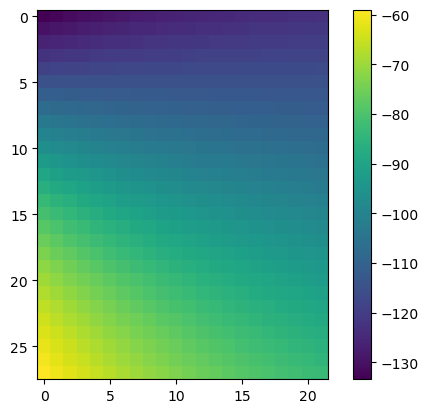

In [87]:
### convert obs lat/long to x,y ###
x_g_m = x_g/100
y_g_m = y_g/100
print(x_g_m.shape)
numer = (((((x_g_m)/map_scale)**2)+(((y_g_m)/map_scale)**2))**(1/2))
denom = rho*(1+(np.cos(psi0)))
psi = (np.pi/2) - (2*(np.arctan(numer/denom))) #x-cord, y-cord to latitude?
psi = np.degrees(psi)

lamda = (np.degrees(np.arctan(y_g_m/x_g_m)))+lambda0 #x-cord, y-cord to longitude?
# print(lamda)

# print(psi,lamda)
plt.imshow(lamda)
plt.colorbar()

In [88]:
### Create function for Cressman Analysis ###
sigma = ((1+np.sin(np.radians(60)))/(1+np.sin(np.radians(latitude))))

x_ob = rho*sigma*(np.cos(np.radians(latitude)))*(np.cos(np.radians(longitude)+np.radians(115))) #converting coords to x
y_ob = rho*sigma*(np.cos(np.radians(latitude)))*(np.sin(np.radians(longitude)+np.radians(115))) #converting coords to y
# print(y_ob.shape)
x_ob = x_ob * map_scale *100 #now in cm
y_ob = y_ob * map_scale *100
# x_ob = x_ob/100
# y_ob = y_ob/100
# print('x_ob', x_ob)
# print('y_ob', y_ob)
dmin = 0.0

for i in range(len(x_ob)):
      # distance_analysis_to_ob = np.sqrt(((x_g_m[i,j]-x_ob)**2)+((y_g_m[i,j]-y_ob)**2))
      distance_ob_to_ob = np.sqrt(((x_ob[i]-x_ob)**2)+((y_ob[i]-y_ob)**2))
      # print("with zero =",len(distance_ob_to_ob))
      distance_ob_to_ob = np.delete(distance_ob_to_ob,i)
      #distance_ob_to_ob = distance_ob_to_ob[distance_ob_to_ob>1e-10] #------------told in class that dmin = avg minimum distance between obs.
      # print("without zero =",len(distance_ob_to_ob))
      #print('distance_ob_to_ob', distance_ob_to_ob)
      #print('distance_ob_to_ob_shape', distance_ob_to_ob.min())
      dmin = dmin + np.amin(distance_ob_to_ob)   
      # print('dmin is', dmin)
      #dmin = distance_ob_to_ob.min()
      # print(temp)

dmin = dmin/len(x_ob)

# dmin_cm = dmin *100 #converting to cm?
dmin_cm = dmin
print('dmin_cm', dmin_cm)

R1 = 4*dmin_cm
R2 = 2.5*dmin_cm
R3 = 1.5*dmin_cm
print('R1', R1)

def cressman(R, dik):
        weight = np.zeros(dik.shape)
        for i in range(len(dik)):
            if dik[i] <R:
                numerator = (R**2) - (dik[i]**2)
                denominator = (R**2) + (dik[i]**2)
                weight[i] = numerator / denominator #renamed weight as something such as easier naming for later
                # print('dik**2', dik**2)
                #print('numerator', numerator)
                #print('denominator', denominator)
                # print('weight', weight)
            #else:
            #        numerator = (R**2) - (dik**2)
            #        denominator = (R**2) + (dik**2)
            #        print('R**2', R**2)
            #        print('numerator', numerator)
            #        print('denominator', denominator)
            #        weight=0
        #print('weight', weight)
        return weight

x_g_cm = x_g_m*100
y_g_cm = y_g_m*100
fa = np.zeros((28,22))
w = []
for i in range(len(x_g_cm)):
    for j in range(len(x_g_cm[i])):
              distance_analysis_to_ob = np.sqrt(((x_g_cm[i,j]-x_ob)**2)+((y_g_cm[i,j]-y_ob)**2))
              dik = distance_analysis_to_ob[distance_analysis_to_ob !=0]
              #dik = dik[dik>R1]
              print('dik**2',dik**2)
              #w.append(cressman(R1, dik))
              w = cressman(R1,dik)
              print('w', w)
              #print('w shape', w.shape)
              fa[i,j] = (np.nansum(w*g_h)/np.nansum(w))
              

#print('D_min =',dmin)
#print('fa', fa)
# plt.contour(fa)


dmin_cm 2.55487008200714
R1 10.21948032802856
dik**2 [3.60111500e+02 1.02156346e+03 9.79735000e+01 5.50524743e+02
 1.51760371e+02 9.79219802e+01 2.58806076e+02 2.23891433e+01
 4.26466045e+02 9.86401353e+02 3.57335322e+02 5.02347847e+02
 3.91741267e+02 1.93501940e+02 1.78571179e+02 1.14973225e+03
 6.07152244e+01 2.55037171e+02 5.29060122e+02 1.11613104e+01
 2.07629966e+01 2.06097802e+02 7.81711579e+02 7.69057187e+01
 7.77032708e+02 5.25590876e+01 6.30190848e+02 3.91707992e+02
 5.85074188e+01 8.72885862e+02 7.66464492e+01 4.84896327e+02
 9.34016166e+02 6.91220707e+02 3.38903105e+01 2.60118005e+01
 6.49776129e+02 9.57161077e+02 9.93745603e+01 3.30549856e+02
 1.07659363e+03 9.20895004e+02 2.58826471e+02 1.26032249e+03
 8.95121602e+01 7.94371083e+02 8.62562603e+02 8.59218207e+02
 1.50468039e+02 1.02914943e+03 1.23284162e+03 1.14209245e+03
 6.16050115e+02 4.76161866e+02 9.91224310e+02 7.03493763e+02
 4.77572004e+02 9.87748423e+02 7.13289161e+02 6.25866417e+02
 7.69780757e+02 1.73406353e+03 2

In [89]:
### Perform 500mb geopotential height analyses using a Cressman weighting Function###
#Use radii of influence 4, 2.5, 1.5 *dmin


# print('dmin', dmin)
# print('dik', dik)

# analysis_list = []
# for i in range(len(x_g_cm)):
    # for j in range(len(x_g_cm[i])):
        # num = sum(w[i]*g_h)
        # den = sum(w[i])
        # analysis = num/den
        # analysis_list.append(analysis)
# analysis_list = np.array(analysis_list).reshape(28,22)

print(fa.shape)
        

cressman_1 = cressman(R1, dik)
cressman_2 = cressman(R2, dik)
cressman_3 = cressman(R3, dik)

#print('cressman_1', cressman_1)

(28, 22)


5868.788043882415


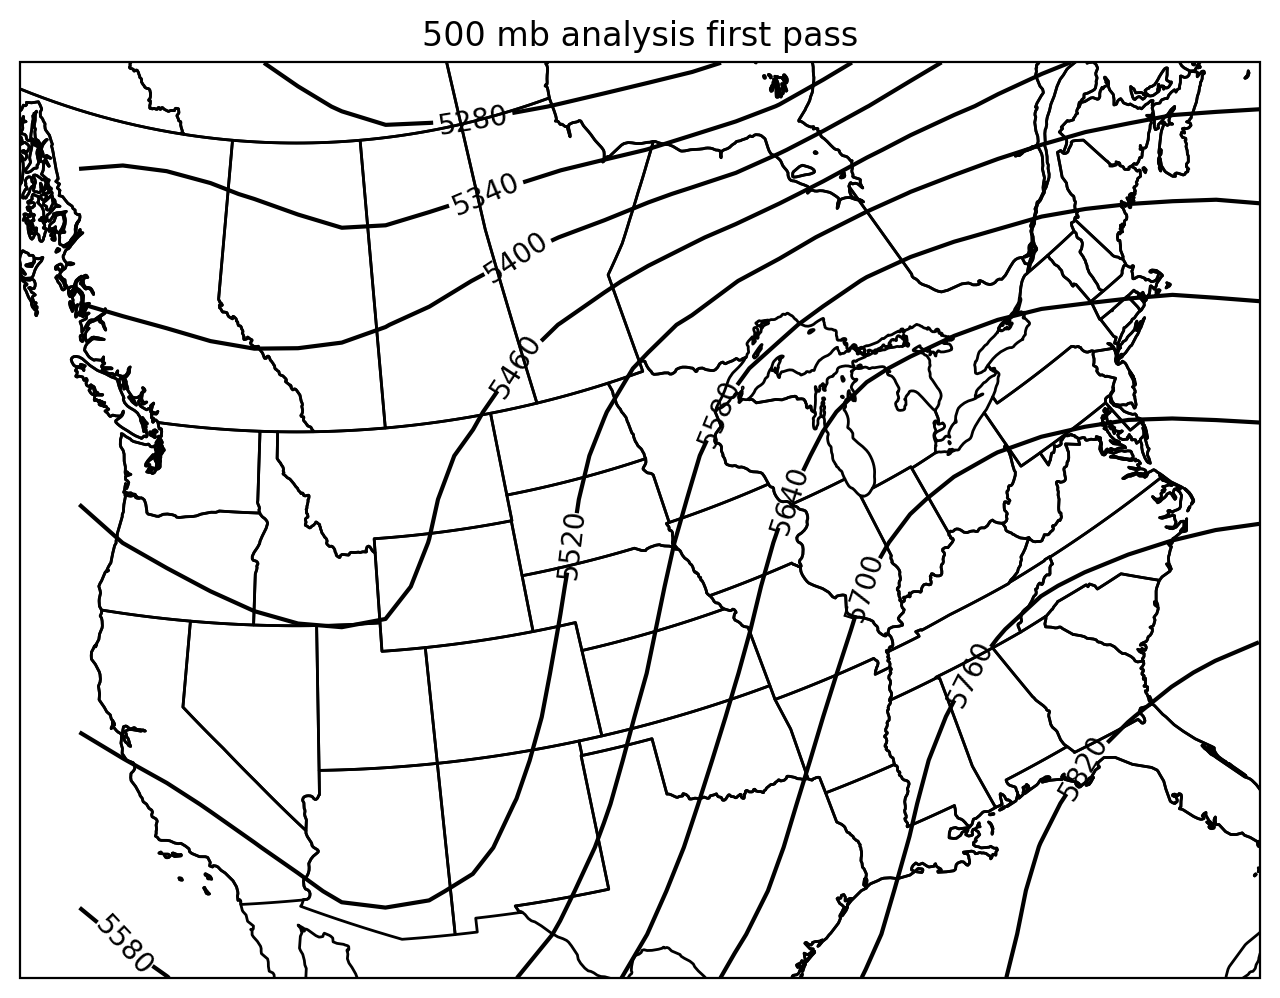

In [90]:
### First analysis, no successive corrections ###
analysis_1 = np.sum(w*dik*g_h)/(np.sum(w*dik))
print(analysis_1)


proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(lamda,psi,fa,colors='k',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.title("500 mb analysis first pass")
plt.show()

In [91]:
### Create function for bilinear interpolation ###
def bilienar_interp(x_ob_cm, y_ob_cm, x_g_cm, y_g_cm):
    # x_k = x_ob*100
    # y_k = y_ob*100
    x_k = x_ob_cm
    y_k = y_ob_cm
    index_x = ((x_k - x0) / delx)
    index_y = ((y_k - y0) / dely)

    #flip x,y to j,i because rows then columns in python
    BLindex_j = int(np.floor(index_x))
    BLindex_i = int(np.floor(index_y))

    print(BLindex_i,BLindex_i+2)
    four_xs = x_g_m[BLindex_i:BLindex_i+2,BLindex_j:BLindex_j+2]
    four_ys = y_g_m[BLindex_i:BLindex_i+2,BLindex_j:BLindex_j+2]
    four_ghs = analysis_1[BLindex_i:BLindex_i+2,BLindex_j:BLindex_j+2]

    dxk = x_ob - four_xs
    dyk = y_ob - four_ys

    # print(four_ghs)

    a_matrix = ([1, np.mean(dxk), np.mean(dyk), np.mean(dxk*dyk)],
             [np.mean(dxk), np.mean(dyk**2), np.mean(dxk*dyk), np.mean((dxk**2)*dyk)]
             [np.mean(dyk), np.mean(dxk*dyk), np.mean(dyk**2), np.mean(dxk*(dyk**2))]
             [np.mean(dxk*dyk), np.mean((dxk**2)*dyk), np.mean(dxk*(dyk**2)), np.mean((dxk**2)(dyk**2))])
    
    b_matrix = ([analysis_1,
                 np.mean(dxk),
                 np.mean(dyk),
                 np.mean(dxk*dyk)])

    coef = np.linalg.inv(a_matrix)*b_matrix

    BLvalue = g_h[BLindex_j, BLindex_i]
    return 

test = bilienar_interp(x_ob[0], y_ob[0], x_g_m, y_g_m)
print (test)

919 921


<>:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
<>:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
/var/folders/ph/gnz9scgj5491zgp3rggx75kr0000gp/T/ipykernel_12875/3403980656.py:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [np.mean(dxk), np.mean(dyk**2), np.mean(dxk*dyk), np.mean((dxk**2)*dyk)]
/var/folders/ph/gnz9scgj5491zgp3rggx75kr0000gp/T/ipykernel_12875/3403980656.py:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [np.mean(dxk), np.mean(dyk**2), np.mean(dxk*dyk), np.mean((dxk**2)*dyk)]
/var/folders/ph/gnz9scgj5491zgp3rggx75kr0000gp/T/ipykernel_12875/3403980656.py:23: SyntaxWarning: list indices must be integers or slices, not tuple; perhaps you missed a comma?
  [np.mean(dxk), np.mean(dyk**2), np.mean(dxk*dyk), np.mean((dxk**2)*dyk)]


IndexError: invalid index to scalar variable.

In [ ]:
### Next Analyses ###
f_aj = analysis_1 + np.sum(something*dik(fo-fa))

In [ ]:
### Calculate Analysis Differences
f_a_diff = f_aj - analysis_1

In [ ]:
### Plot 500mb analyses over a map ###
#use old code...

proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(lamda,psi,analysis_10[:,:],colors='k',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.show()

#for roi20
proj = ccrs.Stereographic(central_longitude=-115,central_latitude=90,true_scale_latitude=60)
fig = plt.figure(figsize=(8,8),dpi=200)
ax1 = fig.add_subplot(111,projection=proj)
ax1.add_feature(cfeature.STATES)
ax1.add_feature(cfeature.COASTLINE)

#plot analysis (MAY NEED TO CHANGE VARIABLE NAMES/INDICES)#
cs1 = ax1.contour(lamda,psi,analysis_20[:,:],colors='k',levels=np.arange(0,8000,60),transform=ccrs.PlateCarree())
plt.clabel(cs1,levels=np.arange(0,8000,60))
plt.show()

In [ ]:
### Plot Analysis Differences ###


In [ ]:
### Store the analyses in text files ###
with open('analyses_10cm.txt','wb') as f:
    for line in analysis_10:
        np.savetxt(f, line, fmt='%.2f')

with open('analyses_20cm.txt','wb') as f:
    for line in analysis_20:
        np.savetxt(f, line, fmt='%.2f')


In [ ]:
### Store the difference fields in text files ###
with open('analyses_10cm.txt','wb') as f:
    for line in analysis_10:
        np.savetxt(f, line, fmt='%.2f')

with open('analyses_20cm.txt','wb') as f:
    for line in analysis_20:
        np.savetxt(f, line, fmt='%.2f')


In [ ]:
### Store RMS values in text file ###
with open('analyses_10cm.txt','wb') as f:
    for line in analysis_10:
        np.savetxt(f, line, fmt='%.2f')

with open('analyses_20cm.txt','wb') as f:
    for line in analysis_20:
        np.savetxt(f, line, fmt='%.2f')


In [ ]:
### In a separte text file (or below), answer the following questions ###
'''
1 - Describe the general features that you see in your contoured analyses.
    

2 - Describe the differences that you see in your contoured analyses.  
    Does one analysis seem to be smoother than the other?  If so, what would cause this?
    

3 - What happens as you increase the number of successive correction passes?  Is this 
    desirable?  Why or why not?
    

'''